# Pymaceuticals Inc.
---

### Analysis

- My tasks are to prepare the data, generate summary statistics, create bar charts and pie charts, calculate quartiles, identify outliers, and create a box plot. Additionally, I will create a line plot and a scatter plot, and calculate correlation and regression.
 

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/kamalova/Desktop/April BootCamp/Homework submission/05-Data-Visualization /Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/kamalova/Desktop/April BootCamp/Homework submission/05-Data-Visualization /Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [131]:
study_results.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [132]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [133]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>

In [160]:
data = {'Mouse ID': ['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989'],
        'Timepoint': [0, 5, 10, 15, 20, 0, 5]}
combined_df = pd.DataFrame(data)

# Group by Mouse ID and Timepoint, and count the occurrences
grouped = combined_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')

# Filter for Mouse IDs and Timepoints where counts are greater than 1 (duplicates)
duplicates = grouped[grouped['counts'] > 1]

# Merge to get the full details of the duplicates from the original DataFrame
dupes_df = pd.merge(combined_df, duplicates[['Mouse ID', 'Timepoint']], on=['Mouse ID', 'Timepoint'], how='inner')

# Reset the index for a cleaner look
dupes_df = dupes_df.reset_index(drop=True)

print(dupes_df)

  Mouse ID  Timepoint
0     g989          0
1     g989          5
2     g989          0
3     g989          5


In [135]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = combined_df[combined_df["Mouse ID"]== "g989"]
dupe_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]

In [137]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [138]:
group_drug = clean_df.groupby(["Drug Regimen"])
group_drug.count().head(15)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#Create df with Tumor Volume statistics
drug_stats_df = group_drug["Tumor Volume (mm3)"].describe()
#drop unnecessary columns for new df
tumor_stats_df = drug_stats_df.drop(columns= ["count","min","25%","50%","75%","max"])
#calculate additional stats for new df
variance = group_drug["Tumor Volume (mm3)"].var()
median = group_drug["Tumor Volume (mm3)"].median()
sem = group_drug["Tumor Volume (mm3)"].sem()
#add additional stats columns to df
tumor_stats_df["variance"] = variance
tumor_stats_df["median"] = median
tumor_stats_df["SEM"] = sem
#reorder columns to reflect order in the instructions
tumor_stats_df = tumor_stats_df[["mean","median","variance","std","SEM"]]
tumor_stats_df


,mean,median,variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [140]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
group_drug.agg({'Tumor Volume (mm3)' : ["median","mean", "var","std","sem"]})

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x7f83bc5479a0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

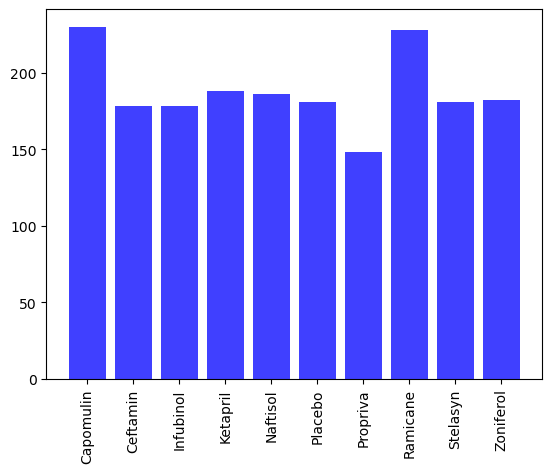

In [149]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PYPLOT.
#x axis
x_axis = np.arange(len(group_drug["Drug Regimen"]))

#y axis
mouse_count = group_drug["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)
    

Text(0.5, 1.0, 'Mice Data per Drug Regimen')

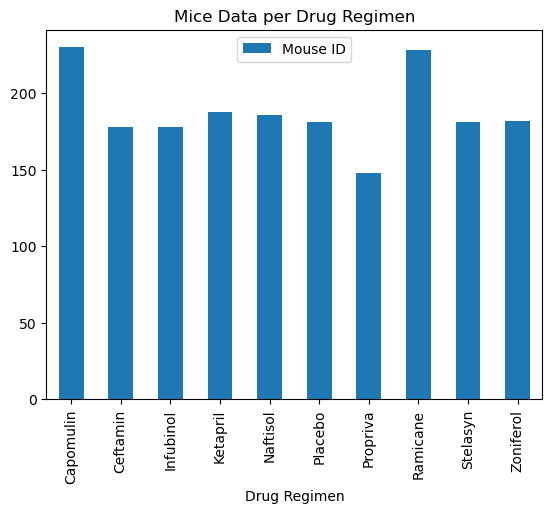

In [142]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count_df.plot(kind="bar")
plt.title("Mice Data per Drug Regimen")

DataFrame columns: Index(['Sex'], dtype='object')


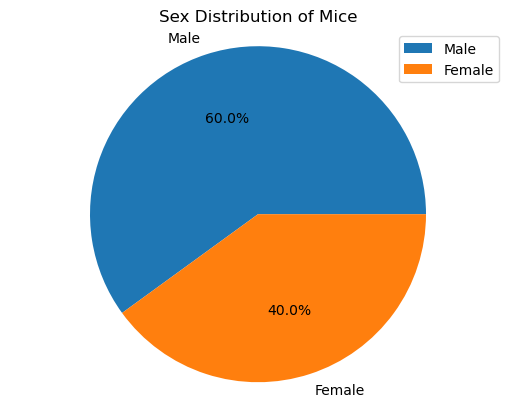

In [156]:
# Example data for demonstration
data = {'Sex': ['Male', 'Female', 'Female', 'Male', 'Male']}
clean_df = pd.DataFrame(data)

# Debugging: Print the columns to ensure 'Sex' is present
print("DataFrame columns:", clean_df.columns)

# Generate the value counts and convert to DataFrame
if 'Sex' in clean_df.columns:
    sex = clean_df["Sex"].value_counts()
    sex_df = sex.to_frame().reset_index()
    sex_df.columns = ['Sex', 'Count']

    # Generate the pie plot
    sex_pie = sex_df.set_index('Sex').plot(kind="pie", y='Count', title="Sex Distribution of Mice", autopct='%1.1f%%')

    plt.axis("equal")
    plt.ylabel('')  # Remove the y-label, as it's not meaningful for a pie chart
    plt.show()
else:
    print("Error: 'Sex' column not found in the DataFrame.")



([<matplotlib.patches.Wedge at 0x7f8388477fa0>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

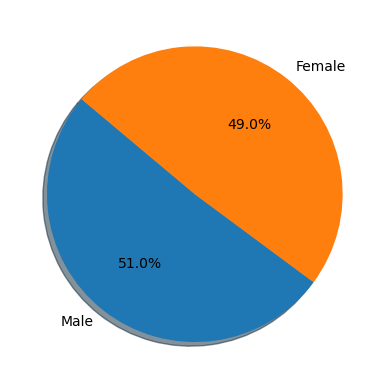

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Create Dataframes for each of the 4 drugs listed.
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]

#combine dataframes
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

# Start by getting the last (greatest) timepoint for each mouse
max_time = group_ID["Timepoint"].max()

# Merge this group df with the original dataframe 
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

#drop all rows that do not include the max time
merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,s185,Capomulin,45,23.343598
19,x401,Capomulin,45,28.484033
29,m601,Capomulin,45,28.430964
34,f966,Capomulin,20,30.485985
44,u364,Capomulin,45,31.023923
...,...,...,...,...
773,x226,Ceftamin,0,45.000000
783,x581,Ceftamin,45,64.634949
793,x822,Ceftamin,45,61.386660
803,y769,Ceftamin,45,68.594745


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


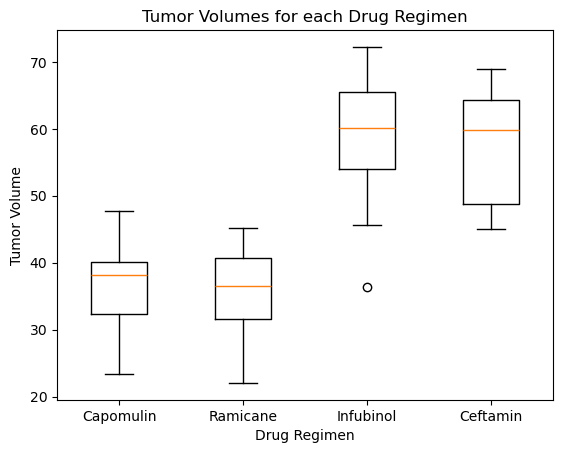

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

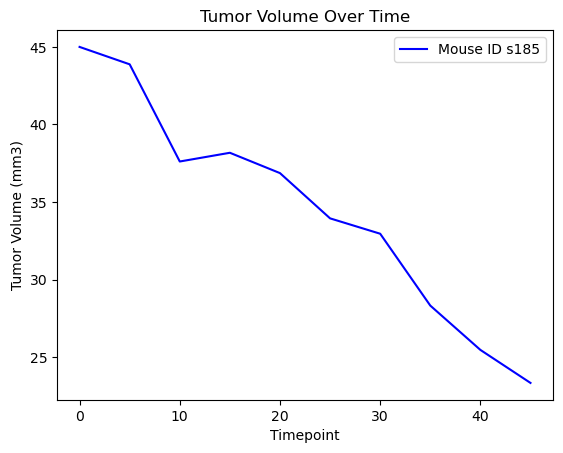

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#View Capomulin_df to choose single mouse
#Pull out data for single mouse
Mouse185 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]

#Create Line Plot
x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [ ]:
#Create df with average weight and average tumor volume
#group by Mouse ID
mouse_data = Capomulin_df.groupby("Mouse ID")
#variables to hold column data
mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()
#create new df
mouse_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})

Text(0, 0.5, 'Tumor Volume (mm3)')

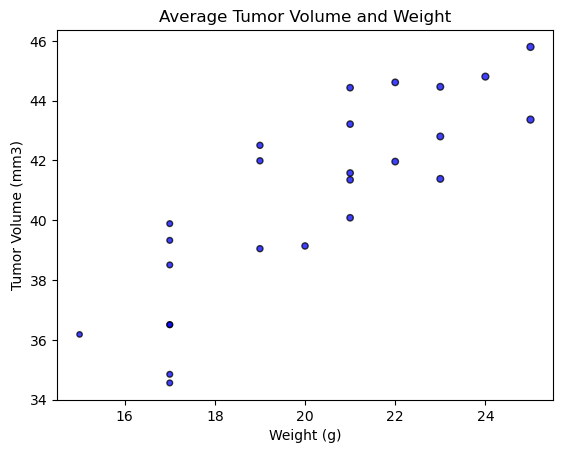

In [144]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


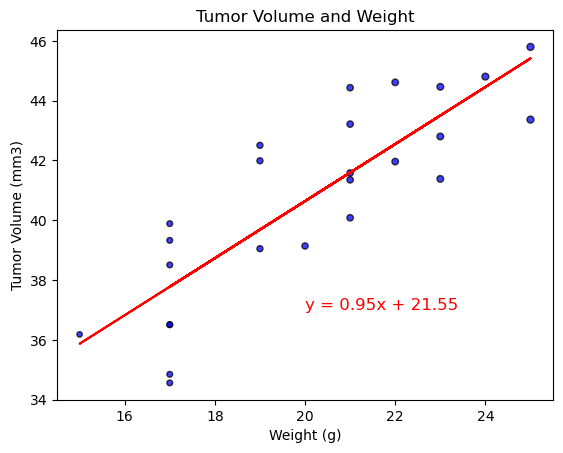

In [121]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#set x and y
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")